## 📌 Introducción a la Regresión Lineal  

### ¿Qué es la Regresión Lineal?  
La **Regresión Lineal** es uno de los modelos más simples y fundamentales en Machine Learning. Se usa para **predecir un valor numérico** (variable dependiente) en función de una o más variables independientes. Su objetivo es encontrar una relación matemática entre las variables y representarla con una **línea recta** que mejor se ajuste a los datos.  

---

### 🌟 Ejemplo práctico  
Imaginemos que queremos analizar **cómo influye la edad en la capacidad de ataque de un jugador de voleibol**.  

El modelo tratará de encontrar una línea que relacione ambas variables para hacer predicciones futuras. Su fórmula es:  

\[
y = b_0 + b_1 x
\]

Donde:  
- \( y \) es el valor que queremos predecir (**capacidad de ataque**).  
- \( x \) es la variable que usamos para predecir (**edad del jugador**).  
- \( b_0 \) y \( b_1 \) son valores que el modelo calcula para ajustar la mejor línea posible.  

El modelo se entrena **ajustando estos valores** para minimizar el error y hacer predicciones más precisas.  

En las siguientes celdas aplicaremos este modelo al dataset de voleibol. 🚀  


Si le apetece entrar mas en detalle con el algoritmo recomiendo esta explicación de AWS: https://aws.amazon.com/es/what-is/linear-regression/

Los import necesarios

In [ ]:
import pandas as pd # Libreria para manejar dataframes
import matplotlib.pyplot as plt # Libreria para graficos
import seaborn as sns # Libreria para graficos 
import numpy as np # Libreria para manejar arreglos


from sklearn.model_selection import train_test_split # Libreria para separar datos de entrenamiento y test
from sklearn.linear_model import LinearRegression # Libreria para regresion lineal




### 1. Cargar el dataset y explorarlo

Un dataset se carga para poder usarlo, y se explora para poder ver los tipos de datos y así, saber los procedimientos 

In [10]:
dataset = pd.read_csv('VNL2023.csv') # Cargamos el dataset en un dataframe de pandas

dataset.head() # Mostramos las primeras 5 filas del dataset

# Información general del dataset
dataset.info()

# Estadísticas descriptivas
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    131 non-null    object 
 1   Country   131 non-null    object 
 2   Age       131 non-null    int64  
 3   Attack    131 non-null    float64
 4   Block     131 non-null    float64
 5   Serve     131 non-null    float64
 6   Set       131 non-null    float64
 7   Dig       131 non-null    float64
 8   Receive   131 non-null    float64
 9   Position  131 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 10.4+ KB


,Age,Attack,Block,Serve,Set,Dig,Receive
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,27.809160,5.642672,0.845573,0.535802,2.192595,3.428397,1.684198
std,4.186268,4.256229,0.700896,0.454346,6.031587,2.077823,1.989939
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000
25%,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000
50%,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000
75%,30.000000,8.600000,1.140000,0.760000,0.000000,4.510000,3.385000
max,41.000000,15.800000,4.080000,2.080000,26.890000,11.440000,6.690000


# 📊 Exploración inicial del dataset  

Antes de aplicar modelos, es fundamental entender nuestros datos. A continuación, analizamos la estructura del dataset.  

---

## 📌 Información del dataset  

El dataset contiene **131 registros** y **10 columnas**:  

| # | Columna   | Descripción |
|---|----------|------------|
| 1 | **Player** | Nombre del jugador |
| 2 | **Country** | País del jugador |
| 3 | **Age** | Edad del jugador |
| 4 | **Attack** | Puntuación en ataque |
| 5 | **Block** | Puntuación en bloqueo |
| 6 | **Serve** | Puntuación en servicio |
| 7 | **Set** | Puntuación en colocación |
| 8 | **Dig** | Puntuación en defensa (excavación) |
| 9 | **Receive** | Puntuación en recepción |
| 10 | **Position** | Posición en el equipo |

Todas las columnas tienen valores completos (**sin valores nulos**).  

---

## 📌 Estadísticas descriptivas  

| Métrica  | Edad | Ataque | Bloqueo | Servicio | Colocación | Defensa | Recepción |
|----------|------|--------|---------|----------|------------|---------|-----------|
| **Cantidad** | 131  | 131    | 131     | 131      | 131        | 131     | 131       |
| **Promedio** | 27.8  | 5.64   | 0.85    | 0.53     | 2.19       | 3.43    | 1.68      |
| **Desviación Estándar** | 4.19  | 4.26   | 0.70    | 0.45     | 6.03       | 2.08    | 1.99      |
| **Mínimo** | 19  | 0.0    | 0.0     | 0.0      | 0.0        | 0.53    | 0.0       |
| **Percentil 25%** | 25  | 2.8    | 0.37    | 0.24     | 0.0        | 1.92    | 0.0       |
| **Mediana (50%)** | 27  | 5.17   | 0.69    | 0.42     | 0.0        | 3.0     | 0.33      |
| **Percentil 75%** | 30  | 8.6    | 1.14    | 0.76     | 0.0        | 4.51    | 3.39      |
| **Máximo** | 41  | 15.8   | 4.08    | 2.08     | 26.89      | 11.44   | 6.69      |

📌 **Observaciones clave:**  
✅ La **edad promedio** de los jugadores es **27.8 años**.  
✅ La **puntuación de ataque varía bastante** (desde 0 hasta 15.8).  
✅ El **bloqueo, servicio y recepción tienen valores bajos**, lo que sugiere que algunos jugadores pueden especializarse en otras áreas.  
✅ La **colocación (Set)** tiene una mediana de **0**, lo que indica que muchos jugadores no desempeñan esta función.  

---


## 2. Visualización de datos

Para una mejor interpretación vamos a ver los datos en gráficos

Exploramos el rango de edad

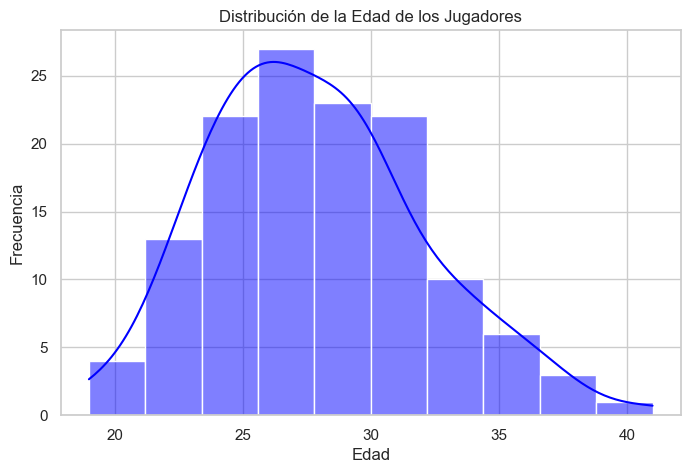

In [11]:
# Configurar estilo de gráficos
sns.set_theme(style="whitegrid")

# Histograma de edades
plt.figure(figsize=(8,5))
sns.histplot(dataset["Age"], bins=10, kde=True, color="blue")
plt.title("Distribución de la Edad de los Jugadores")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

## 📊 Distribución de la Edad de los Jugadores  

Este gráfico es un **histograma** que representa cómo se distribuyen las edades de los jugadores en nuestro dataset.  

### 🔍 ¿Qué podemos observar?  
✅ La mayoría de los jugadores tienen entre **25 y 30 años**, lo que indica que esta es la edad más común en la muestra.  
✅ La distribución es **asimétrica a la derecha**, lo que significa que hay más jugadores jóvenes que veteranos.  
✅ Hay menos jugadores por debajo de los **20 años** y por encima de los **35 años**.  

### 📌 ¿Por qué es útil este análisis?  
Comprender la distribución de la edad nos ayuda a ver si ciertas habilidades pueden estar relacionadas con la experiencia (edad) de los jugadores. En los siguientes análisis, veremos cómo la edad influye en el rendimiento. 🚀  


## 3. Preparación de datos

In [ ]:
# Definir variables
X = dataset[["Age"]]  # Variable independiente (Edad)
y = dataset["Attack"]  # Variable dependiente (Capacidad de ataque)

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




Ecuación del modelo: Attack = 9.84 + -0.15 * Age


# 📈 Aplicando Regresión Lineal: Edad vs Capacidad de Ataque  

Después de analizar los datos, aplicaremos **Regresión Lineal** para evaluar si la **edad** influye en la **capacidad de ataque** de los jugadores.  

---

## 📌 Preparar los datos  

Antes de entrenar el modelo, debemos seleccionar nuestras variables:  

- **Variable independiente (`X`)**: Edad del jugador (`Age`).  
- **Variable dependiente (`y`)**: Capacidad de ataque (`Attack`).  

También dividimos los datos en dos conjuntos:  
- **Entrenamiento (80%)** → Usado para ajustar el modelo.  
- **Prueba (20%)** → Usado para evaluar el modelo.  

## 4. Entrenar modelo

In [ ]:
# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener coeficientes
b0 = modelo.intercept_
b1 = modelo.coef_[0]

print(f"Ecuación del modelo: Attack = {b0:.2f} + {b1:.2f} * Age")

## 📌 Entrenar el Modelo  

Ahora que hemos preparado los datos, es momento de entrenar nuestro modelo de **Regresión Lineal**.  

### 🔹 Creación y entrenamiento  
Utilizaremos `LinearRegression` de **scikit-learn** para entrenar el modelo con los datos de entrenamiento.

## 5. Visualizar la línea de regresión

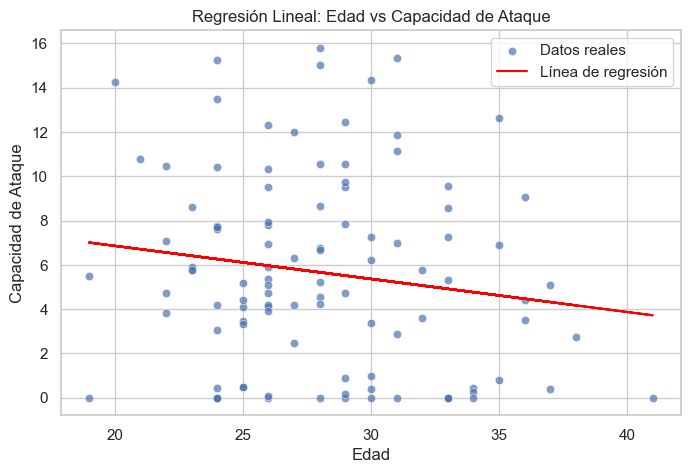

In [17]:

# Gráfico de dispersión + recta de regresión
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_train["Age"], y=y_train, alpha=0.7, label="Datos reales")
plt.plot(X_train, modelo.predict(X_train), color="red", label="Línea de regresión")
plt.title("Regresión Lineal: Edad vs Capacidad de Ataque")
plt.xlabel("Edad")
plt.ylabel("Capacidad de Ataque")
plt.legend()
plt.show()


## 📊 Visualización de la Regresión Lineal  

En el gráfico, representamos la relación entre la **edad** de los jugadores y su **capacidad de ataque**, junto con la **línea de regresión** ajustada por el modelo.

### 🔹 Interpretación del gráfico  
- 🔵 **Puntos azules**: Representan los valores reales del conjunto de entrenamiento.  
- 🔴 **Línea roja**: Representa la predicción del modelo de regresión lineal.  
- 📉 La pendiente de la línea es **negativa**, lo que sugiere que a mayor edad, la capacidad de ataque **tiende a disminuir**.  

### 🔍 ¿Qué significa esto?  
- Si la relación fuera fuerte, los puntos estarían **más cerca de la línea roja**.  
- Sin embargo, los datos están bastante dispersos, lo que indica que la edad no es un factor **determinante** para la capacidad de ataque.  
- La regresión lineal intenta modelar una relación **lineal**, pero puede que una **relación más compleja** se ajuste mejor a los datos.  
